In [484]:
import numpy as np
import pandas as pd
from pandas.plotting import table 
import matplotlib.pyplot as plt
import matplotlib
import six
import warnings
from IPython.display import display  # Print multiple pandas statements in a single cell

warnings.filterwarnings("ignore")
matplotlib.style.use('default')

In [485]:
# Class definitions

class Location(object):
    def init(self, name, population, cases, casesPerCapita):
        
        self.name = name
        self.population = population
        self.cases = cases
        self.casesPerCapita = casesPerCapita

In [486]:
# Function definitions

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=10,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
            
    return ax

In [487]:
data = pd.read_csv(r"C:/Users/Matth/git/DataAnalysisWorkbooks/Covid19/Data/Raw_data/owid-covid-data.csv")

In [488]:
df1 = data.set_index('location')

location = df1.loc['Africa']
location['total_cases'].max()

10124569.0

In [489]:
countries = list(data['location'].unique())
locations = []

# Remove aggregated locations
countries.remove('Africa')
countries.remove('Asia')
countries.remove('North America')
countries.remove('South America')
countries.remove('Europe')
countries.remove('Oceania')
countries.remove('World')
countries.remove('Low income')
countries.remove('High income')
countries.remove('Lower middle income')
countries.remove('Upper middle income')

for i, country in enumerate(countries):
    locations.append( Location() )
    
    temp = df1.loc[country]
    locations[i].name = country
    locations[i].population = temp['population'].max()
    
    locations[i].cases = temp['total_cases'].max()    
    locations[i].casesPerCapita = locations[i].cases / locations[i].population


In [490]:
name, casesPerCapita = [], []

for i in range(len(locations)):
    name.append(locations[i].name)
    casesPerCapita.append(locations[i].casesPerCapita)

In [491]:
# Create a dataframe for list of countries and their current total_cases

d = {'Country': countries, 'Cases per capita': casesPerCapita, 'Deaths per capita': deathsPerCapita, 'Vacc per capita': vaccPerCapita}
df = pd.DataFrame(d)

<AxesSubplot:title={'center':'Cases per capita'}, ylabel='Density'>

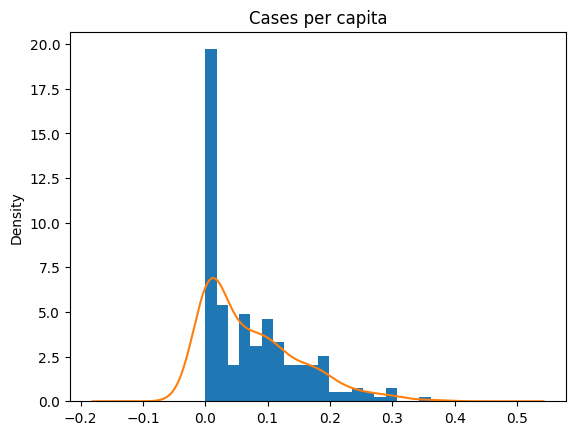

In [492]:
ax = df.hist('Cases per capita', grid = False, bins = 20, density=True)
df['Cases per capita'].plot.kde()

<AxesSubplot:>

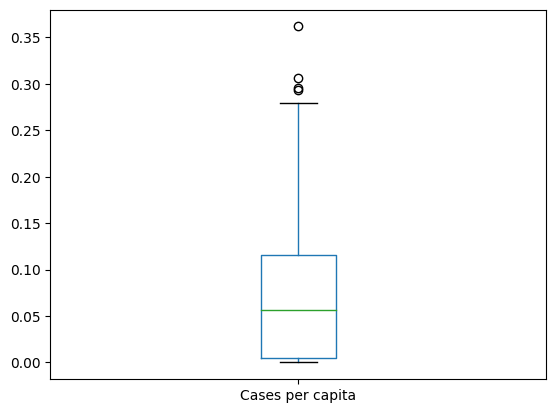

In [493]:
# Box-and-whisker plots of per capita data

df.boxplot('Cases per capita', grid = False)

Text(0.5, 0.98, '')

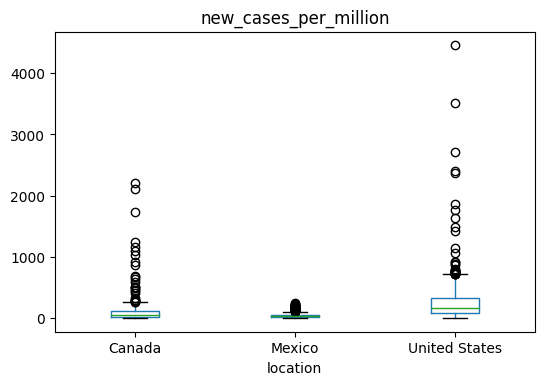

In [502]:
df1 = data[(data['location'] == 'United States') | (data['location'] == 'Canada') | (data['location'] == 'Mexico')]

fig, ax = plt.subplots(figsize=(6,4))
df1.boxplot(column=['new_cases_per_million'], by='location', grid = False, ax=ax)
fig.suptitle('')

In [495]:
# Rank order the top ten countries with the highest Covid19 cases, deaths, vaccinated per capita
save_table = False

if save_table:
    df1 = df.drop('Vacc per capita', 1).drop('Deaths per capita', 1).dropna().round(decimals = 4).sort_values('Cases per capita', axis=0, ascending = False, ignore_index = True).head(10)
    ax = render_mpl_table(df1, header_columns=0, col_width=2.0)
    fig = ax.get_figure()
    fig.savefig('temp1.png')
    
df.drop('Vacc per capita', 1).drop('Deaths per capita', 1).dropna().round(decimals = 4).sort_values('Cases per capita', axis=0, ascending = False, ignore_index = True).head(10)

,Country,Cases per capita
0,Andorra,0.3618
1,Montenegro,0.3060
2,Gibraltar,0.2959
3,Seychelles,0.2935
4,San Marino,0.2799
5,Aruba,0.2602
6,Slovakia,0.2561
7,Georgia,0.2419
8,Slovenia,0.2373
9,Czechia,0.2360


In [496]:
# Correlation between variables with conditioning

df1 = data.set_index('location')
df2 = df1.loc['United States']


print('Correlation between Covid-19 cases and Covid-19 deaths:')
display(df2['total_cases'].dropna().corr(df2['total_deaths']))
print('---------')

print('Correlation between Covid-19 cases and Covid-19 vaccinations:')
display(df2['total_cases'].dropna().corr(df2['total_vaccinations']))
print('---------')

print('Correlation between Covid-19 deaths and Covid-19 vaccinations:')
display(df2['total_deaths'].dropna().corr(df2['total_vaccinations']))

Correlation between Covid-19 cases and Covid-19 deaths:


0.9933906163611875

---------
Correlation between Covid-19 cases and Covid-19 vaccinations:


0.928767855442837

---------
Correlation between Covid-19 deaths and Covid-19 vaccinations:


-7.504656066924606e-18

In [497]:
# Correlation matrix
pd.set_option("display.max_rows", None, "display.max_columns", None)  # Shows whole table without "..."
df2.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
total_cases,1.000000,0.398045,0.453737,0.993391,0.087776,0.119998,1.000000,0.398045,0.453737,0.993391,0.087773,0.120005,-0.229521,0.096937,0.096936,0.107194,0.107194,NaN,NaN,0.097196,0.097196,0.513394,0.996582,0.996582,0.513391,0.591046,0.591047,-0.059655,0.108759,0.928768,0.897671,0.880939,0.937980,-0.123864,-0.108587,0.928768,0.897669,0.880941,0.937962,-0.108583,-0.418106,-0.418128,-0.058931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990299,0.752291,0.109067,0.990299
new_cases,0.398045,1.000000,0.876186,0.319668,0.437941,0.360499,0.398045,1.000000,0.876186,0.319668,0.437934,0.360494,-0.047224,0.586599,0.586599,0.682707,0.682707,NaN,NaN,0.714475,0.714475,0.659450,0.329988,0.329988,0.659454,0.631814,0.631816,0.579423,-0.463900,0.095558,0.031413,0.039265,0.455194,-0.112112,-0.218345,0.095560,0.031402,0.039265,0.455191,-0.218343,-0.196286,-0.196176,0.204050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.095601,0.361588,0.674933,0.095601
new_cases_smoothed,0.453737,0.876186,1.000000,0.368672,0.429176,0.494981,0.453737,0.876186,1.000000,0.368672,0.429168,0.494979,-0.126400,0.742255,0.742255,0.839233,0.839233,NaN,NaN,0.873017,0.873017,0.696578,0.375235,0.375235,0.696578,0.794316,0.794313,0.630762,-0.557067,0.034401,-0.040085,-0.026117,0.501997,-0.232139,-0.264732,0.034404,-0.040093,-0.026118,0.501978,-0.264729,-0.218917,-0.218879,0.259863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.385474,0.507066,0.776512,0.385474
total_deaths,0.993391,0.319668,0.368672,1.000000,0.054600,0.083925,0.993391,0.319668,0.368672,1.000000,0.054598,0.083931,-0.284264,0.016130,0.016130,0.023822,0.023822,NaN,NaN,0.013763,0.013763,0.515461,0.992529,0.992529,0.515459,0.589457,0.589458,-0.135260,0.170427,0.956281,0.939709,0.916609,0.940856,-0.069050,-0.041953,0.956281,0.939707,0.916612,0.940845,-0.041948,-0.366861,-0.366889,-0.465198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.995838,0.805703,-0.036655,0.995838
new_deaths,0.087776,0.437941,0.429176,0.054600,1.000000,0.816882,0.087776,0.437941,0.429176,0.054600,1.000000,0.816880,-0.293180,0.681152,0.681152,0.681809,0.681809,NaN,NaN,0.636729,0.636729,0.616604,0.047453,0.047453,0.616590,0.437805,0.437796,0.485407,-0.480812,-0.424917,-0.468250,-0.443958,-0.125638,0.118005,-0.137011,-0.424916,-0.468246,-0.443963,-0.125640,-0.137012,-0.012152,-0.012014,0.383103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.229688,0.027439,0.703488,-0.229688
new_deaths_smoothed,0.119998,0.360499,0.494981,0.083925,0.816882,1.000000,0.119998,0.360499,0.494981,0.083925,0.816884,1.000000,-0.392378,0.803242,0.803242,0.7965

<AxesSubplot:xlabel='new_cases_per_million'>

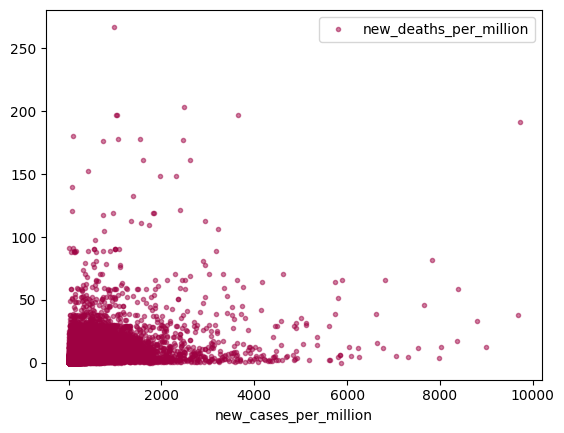

In [521]:
# Scatter plots
from matplotlib import cm

cmap = cm.get_cmap('Spectral')

df1 = data.loc[(0 < data['new_cases_per_million']) & (data['new_cases_per_million'] < 10000)]
df2 = df1.loc[0 < data['new_deaths_per_million']]
df2.plot(x='new_cases_per_million', y='new_deaths_per_million', style='.', alpha = 0.5, cmap=cmap)